# RFM
Phân tích RFM là một kĩ thuật phân khúc khách hàng dựa trên hành vi giao dịch của khách hàng trong quá khứ, RFM bao gồm 3 chỉ số chính:

Recency (R): Thời gian giao dịch cuối cùng.
Frequency (F): Tổng số lần giao dịch chi tiêu.
Monetary value (M): Tổng só tiền giao dịch chi tiêu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
PATH='D:\Thực hành Tableua\Dataset\Sample Supper Store VN.xls'

In [3]:
df = pd.read_excel(PATH)
data = df[['Order Date','Customer ID','Order ID','Sales']]

In [4]:
data.head()

,Order Date,Customer ID,Order ID,Sales
0,2020-06-19,ZC-21910,US-2019-102288,10212.0
1,2020-03-02,RS-19765,CA-2019-124114,12788.0
2,2019-06-21,KB-16600,CA-2018-168361,19228.0
3,2017-03-31,JO-15280,CA-2016-112403,19596.0
4,2017-09-26,HG-14965,US-2016-152723,20148.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order Date   9994 non-null   datetime64[ns]
 1   Customer ID  9994 non-null   object        
 2   Order ID     9994 non-null   object        
 3   Sales        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 312.4+ KB


In [6]:
print(data['Order Date'].min(),'\n',data['Order Date'].max())

2017-01-03 00:00:00 
 2020-12-30 00:00:00


In [7]:
sd =dt.datetime(2021,1,1)
data['hist']=sd-data['Order Date']
data['hist']=data['hist']/np.timedelta64(1,'D')

C:\Users\TSC\AppData\Local\Temp/ipykernel_10056/4051853709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hist']=sd-data['Order Date']
C:\Users\TSC\AppData\Local\Temp/ipykernel_10056/4051853709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hist']=data['hist']/np.timedelta64(1,'D')


In [8]:
#Chọn những đơn hàng trong vòng 2 năm đổ lại
data[data['hist']<730]

,Order Date,Customer ID,Order ID,Sales,hist
0,2020-06-19,ZC-21910,US-2019-102288,10212.0,196.0
1,2020-03-02,RS-19765,CA-2019-124114,12788.0,305.0
2,2019-06-21,KB-16600,CA-2018-168361,19228.0,560.0
7,2020-10-12,NK-18490,CA-2019-126536,22770.0,81.0
10,2020-07-09,TD-20995,US-2019-100209,24840.0,176.0
...,...,...,...,...,...
9988,2019-12-17,AB-10105,CA-2018-117121,227533020.0,381.0
9989,2020-11-17,HL-15040,CA-2019-166709,241499310.0,45.0
9990,2020-10-22,TA-21385,CA-2019-127180,257599264.0,71.0
9991,2020-03-23,RB-19360,CA-2019-140151,321999080.0,284.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order Date   9994 non-null   datetime64[ns]
 1   Customer ID  9994 non-null   object        
 2   Order ID     9994 non-null   object        
 3   Sales        9994 non-null   float64       
 4   hist         9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 390.5+ KB


In [10]:
#Tính RFM
rfmtable=data.groupby('Customer ID').agg({'hist': lambda x : x.min(),#recency
                                       'Customer ID': lambda x : len(x),#Frequency
                                       'Sales': lambda x : sum(x) #monetary value
                                       })
rfmtable.rename(columns={'hist':'recency',
                        'Customer ID' : 'frequency',
                        'Sales':'monetary'},inplace=True)


In [11]:
rfmtable.head()

,recency,frequency,monetary
Customer ID,,,
AA-10315,186.0,11,127961880.0
AA-10375,21.0,15,24296970.0
AA-10480,261.0,12,41181776.0
AA-10645,57.0,18,116999505.0
AB-10015,418.0,6,20381588.0


In [12]:
data[data['Customer ID']=='AA-10315']

,Order Date,Customer ID,Order ID,Sales,hist
105,2019-03-03,AA-10315,CA-2018-103982,52992.0,670.0
1615,2020-06-29,AA-10315,CA-2019-147039,265420.0,186.0
2099,2017-09-15,AA-10315,CA-2016-138100,334880.0,1204.0
2180,2017-09-15,AA-10315,CA-2016-138100,343620.0,1204.0
3481,2018-10-04,AA-10315,CA-2017-121391,620080.0,820.0
4447,2019-03-03,AA-10315,CA-2018-103982,959560.0,670.0
4949,2017-03-31,AA-10315,CA-2016-128055,1218540.0,1372.0
8395,2020-06-29,AA-10315,CA-2019-147039,8347620.0,186.0
8618,2019-03-03,AA-10315,CA-2018-103982,9935448.0,670.0
9186,2017-03-31,AA-10315,CA-2016-128055,15492064.0,1372.0


In [13]:
quartiles= rfmtable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary
0.25,32.0,8.0,26569646.0
0.50,77.0,12.0,52002034.0
0.75,185.0,16.0,87263840.0


In [14]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 32.0, 0.5: 77.0, 0.75: 185.0},
 'frequency': {0.25: 8.0, 0.5: 12.0, 0.75: 16.0},
 'monetary': {0.25: 26569646.0, 0.5: 52002034.0, 0.75: 87263840.0}}

In [15]:
# For Recency
def RCLASS(value,field,df):
    if value <= df[field][0.25]:
        return 1
    elif value <= df[field][0.50]:
        return 2
    elif value <= df[field][0.75]:
        return 3
    else:
        return 4
# for frequency and monetary value
def FMCLASS(value,field,df):
    if value >= df[field][0.75]:
        return 1
    elif value >= df[field][0.50]:
        return 2
    elif value >= df[field][0.25]:
        return 3
    else:
        return 4

In [16]:
rfmSeg = rfmtable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RCLASS,args=('recency',quartiles))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMCLASS,args=('frequency',quartiles))
rfmSeg['M_Quartile'] = rfmSeg['monetary'].apply(FMCLASS,args=('monetary',quartiles))

In [17]:
rfmSeg 

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
Customer ID,,,,,,
AA-10315,186.0,11,127961880.0,4,3,1
AA-10375,21.0,15,24296970.0,1,2,4
AA-10480,261.0,12,41181776.0,4,2,3
AA-10645,57.0,18,116999505.0,2,1,1
AB-10015,418.0,6,20381588.0,4,4,4
...,...,...,...,...,...,...
XP-21865,45.0,28,54617134.0,2,1,2
YC-21895,6.0,8,125450050.0,1,3,1
YS-21880,11.0,12,154570212.0,1,2,1


In [18]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) + rfmSeg.F_Quartile.map(str) + rfmSeg.M_Quartile.map(str)
rfmSeg

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,
AA-10315,186.0,11,127961880.0,4,3,1,431
AA-10375,21.0,15,24296970.0,1,2,4,124
AA-10480,261.0,12,41181776.0,4,2,3,423
AA-10645,57.0,18,116999505.0,2,1,1,211
AB-10015,418.0,6,20381588.0,4,4,4,444
...,...,...,...,...,...,...,...
XP-21865,45.0,28,54617134.0,2,1,2,212
YC-21895,6.0,8,125450050.0,1,3,1,131
YS-21880,11.0,12,154570212.0,1,2,1,121


In [19]:
rfmSeg.sort_values(by=['RFMClass', 'monetary'], ascending=[True, False])

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,
SE-20110,11.0,19,280817074.0,1,1,1,111
PO-18850,6.0,22,236707048.6,1,1,1,111
JL-15835,23.0,34,225398229.0,1,1,1,111
PK-19075,11.0,25,198879482.0,1,1,1,111
HM-14860,4.0,20,189445590.4,1,1,1,111
...,...,...,...,...,...,...,...
SG-20890,228.0,5,1102758.0,4,4,4,444
MG-18205,266.0,2,384997.0,4,4,4,444
CJ-11875,368.0,1,379960.0,4,4,4,444


In [20]:
rfmSeg.groupby('RFMClass').agg('monetary').mean().astype('int')

RFMClass
111    135285016
112     65023099
113     35564417
114     26165168
121    124550884
122     65887994
123     43233044
124     22879173
131    137582768
132     75668211
133     35955509
134     17146502
142     60151463
143     37987185
144     10305337
211    159490445
212     67768019
213     42040297
221    119371286
222     70213227
223     37076575
224     22710729
231    172254539
232     69271815
233     39413778
234     18728444
241    143525750
243     38532302
244     13647102
311    163930456
312     69779868
313     44075401
314     19662401
321    161827518
322     66986430
323     38892542
324     19335065
331    110132635
332     67990762
333     39085422
334     16658574
341     89890026
342     57900786
343     34935222
344     14344924
411    177324018
412     71076626
413     41132129
414     15735933
421    163931078
422     63921690
423     39933620
424     19947665
431    128517732
432     61397747
433     39280861
434     17875623
442     61139934
443  

In [21]:
# Phân loại dựa trên tổng điểm 
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   recency      793 non-null    float64
 1   frequency    793 non-null    int64  
 2   monetary     793 non-null    float64
 3   R_Quartile   793 non-null    int64  
 4   F_Quartile   793 non-null    int64  
 5   M_Quartile   793 non-null    int64  
 6   RFMClass     793 non-null    object 
 7   Total Score  793 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB
             recency  frequency     monetary  R_Quartile  F_Quartile  \
Customer ID                                                            
AA-10315       186.0         11  127961880.0           4           3   
AA-10375        21.0         15   24296970.0           1           2   
AA-10480       261.0         12   41181776.0           4           2   
AA-10645        57.0         18  116999505.0  

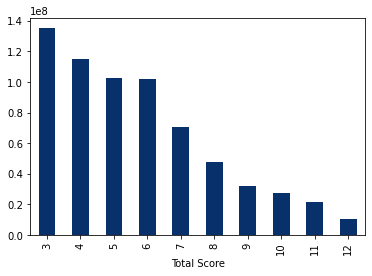

In [22]:
rfmSeg.groupby('Total Score').agg('monetary').mean().plot(kind='bar', colormap='Blues_r');

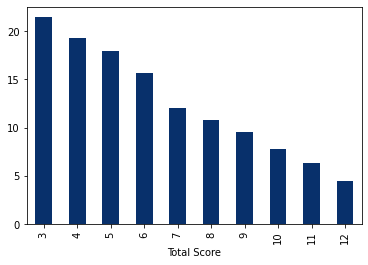

In [23]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r');

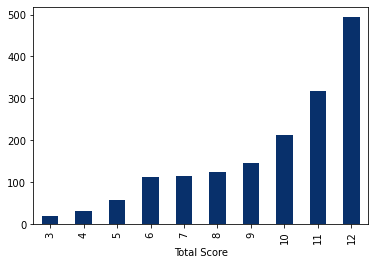

In [24]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r');

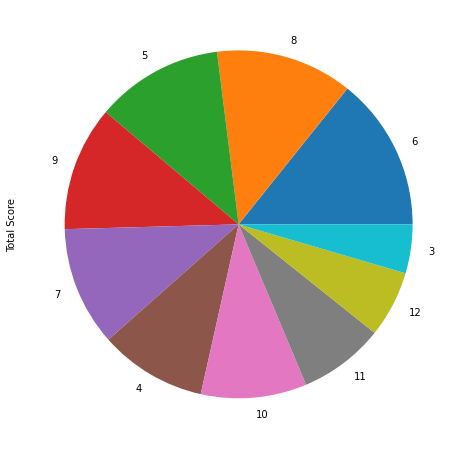

In [25]:
# Pie chart
seg=rfmSeg['Total Score'].value_counts()
plt.figure(figsize=(10,8))
seg.plot.pie()
plt.gca().set_aspect('equal')

In [45]:
rfmPercentage=rfmSeg['RFMClass'].value_counts()
per= rfmPercentage/(rfmSeg['RFMClass'].value_counts().sum())*100
per

444    6.179067
111    4.539723
112    3.783102
211    3.656999
212    3.026482
344    3.026482
311    2.900378
233    2.900378
244    2.774275
433    2.648172
121    2.522068
434    2.522068
333    2.395965
443    2.395965
221    2.395965
312    2.395965
144    2.269861
411    2.269861
322    2.143758
123    2.143758
122    2.017654
332    2.017654
133    2.017654
134    2.017654
321    1.891551
222    1.891551
334    1.765448
232    1.765448
423    1.639344
343    1.513241
323    1.513241
432    1.387137
422    1.387137
234    1.387137
324    1.387137
213    1.261034
231    1.261034
223    1.008827
132    1.008827
421    1.008827
143    1.008827
113    0.882724
431    0.756620
331    0.756620
412    0.756620
131    0.630517
442    0.630517
313    0.630517
413    0.504414
243    0.504414
424    0.504414
342    0.504414
124    0.378310
241    0.378310
142    0.252207
314    0.252207
224    0.252207
414    0.126103
341    0.126103
114    0.126103
Name: RFMClass, dtype: float64

'High number of customers churn'

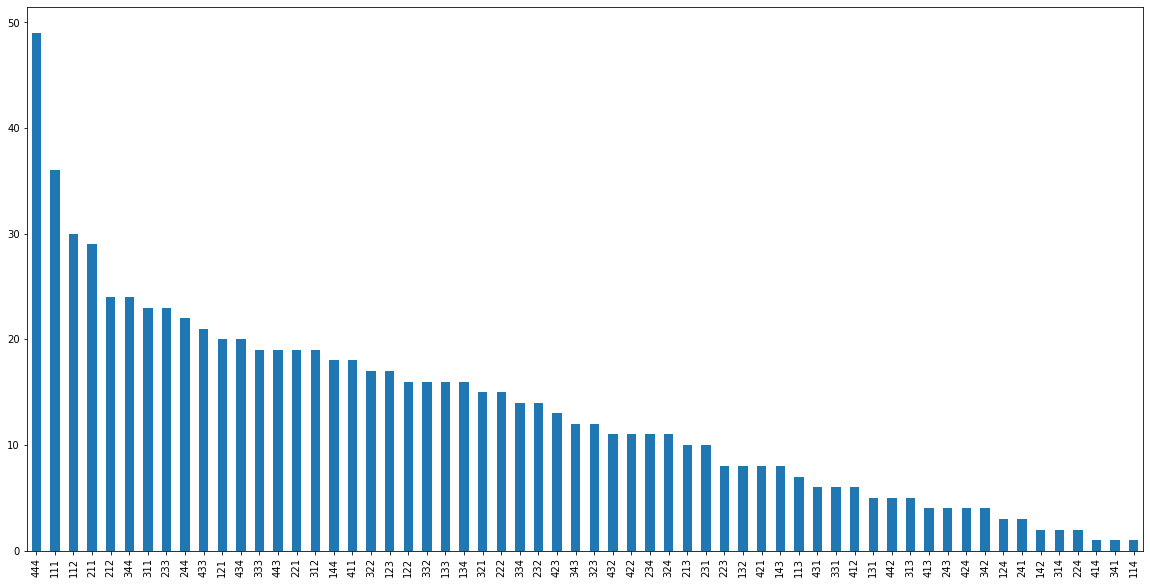

In [33]:
seg1=rfmSeg['RFMClass'].value_counts()
plt.figure(figsize=(20,10))
seg1.plot.bar();
'''High number of customers churn but only 6%'''

In [53]:
customer_churn=rfmSeg[rfmSeg['RFMClass']=='444']
customer_churn.index

Index(['AB-10015', 'AC-10420', 'AC-10660', 'AF-10885', 'AO-10810', 'AR-10570',
       'BD-11560', 'BT-11440', 'BT-11485', 'BW-11065', 'CG-12520', 'CJ-11875',
       'CM-11935', 'CR-12625', 'CS-12130', 'DB-13360', 'DP-13165', 'FW-14395',
       'GP-14740', 'HD-14785', 'HM-14980', 'JD-16060', 'JJ-15445', 'JJ-15760',
       'JK-15325', 'KS-16300', 'KW-16570', 'LD-16855', 'LH-17020', 'LS-17230',
       'MG-18205', 'MS-17530', 'MS-17830', 'NB-18580', 'NF-18475', 'PB-19210',
       'PC-19000', 'RB-19645', 'RE-19405', 'RH-19555', 'RM-19750', 'SG-20890',
       'SM-20005', 'SM-20905', 'SS-20515', 'TR-21325', 'TS-21085', 'TT-21265',
       'VG-21805'],
      dtype='object', name='Customer ID')